##### Author: Souham Sengupta
##### Date: Jan 22, 2025 
##### Topic: Normal Distribution and Its Applications in Quantitative Finance and Algorithmic Trading 
##### LinkedIn: https://www.linkedin.com/in/souham-sengupta/

## Normal Distribution and Its Applications in Quantitative Finance and Algorithmic Trading

The normal distribution, commonly known as the Gaussian distribution or bell curve, is a statistical cornerstone with extensive applications in quantitative finance and algorithmic trading. It offers a framework for modeling probabilities, analyzing data, and making informed f inancial decisions. This post delves into its properties, uses, and limitations, supplemented with Python implementations for hands-on understanding.

#### Key Properties of the Normal Distribution
##### 1.Symmetry: The distribution is perfectly symmetrical about the mean (μ). 
##### 2.Central Tendency: Mean = Median = Mode, representing the peak of the curve. 
##### 3.Empirical Rule:––68% of values lie within ±1σ, 95% within ±2σ and 99.7% within ±3σ. 
##### 4.Standard Deviation (σ ): Quantifies data spread around the mean. Smaller σ: narrow curve; Larger σ: wide curve. 
##### 5.Central Limit Theorem (CLT): The mean of independent, identically distributed random variables approaches a normal distribution as the sample size increases.

### Python: Visualizing the Normal Distribution

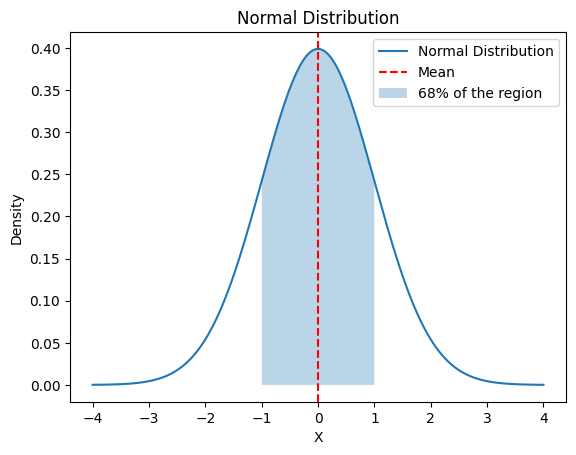

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean, std_dev = 0,1
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, mean, std_dev)
# Plot 
plt.plot(x, pdf, label= 'Normal Distribution') 
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.fill_between(x, pdf, where=(x >= -1) & (x <= 1), alpha=0.3, label='68% of the region')
plt.title("Normal Distribution")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()

### Applications in Quantitative Finance 
##### 1.Stock Market Analysis:
##### - Returns over short timeframes often approximate a normal distribution.
##### - Standard Deviation Bands: Used to identify overbought or oversold conditions. 
##### 2.Portfolio Management:Under the assumption of multivariate normality, portfolio returns also follow a normal distribution.Risk is quantified as variance (σ2). 
##### 3.Option Pricing:Black-Scholes Model: Assumes log returns are normally distributed, making stock prices follow a log-normal distribution:
##### St =S0 exp((μ−0.5σ2)t+σWt )

### Python Implementation

In [10]:
from scipy.stats import norm
def black_scholes(S, K, T, r, sigma, option_type= 'call'):
    d1= (np.log(S/K) + (r + 0.5** sigma**2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    if option_type== 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
         return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Example
call_price = black_scholes(S=100, K=105, T=1, r=0.05, sigma=0.2, option_type='call')
print(f"Call Option Price: {call_price:.2f}")


    

Call Option Price: 0.12


### 1. Risk Management:– Value at Risk (VaR): Max potential loss a portfolio can incur over a specific time period
### VaR=μ−z⋅σ 
### where z= Quantile of the normal distribution.

### Python: VaR Calculation

In [11]:
confidence_level = 0.95
z_score = norm.ppf(confidence_level)
VaR = mean - z_score * std_dev
print(f"Value at Risk (95% Confidence): {VaR:.2f}")

Value at Risk (95% Confidence): -1.64


### Applications in Algorithmic Trading 
##### 1. Predicting Market Behavior:
     –Fitting historical data to the normal distribution helps estimate price movement probabilities.
##### 2. Statistical Arbitrage:
     –Pairs Trading: Z-score measures deviations in spreads:
        z=Spread−μ/σ

### Python: Pairs Trading Z-Score

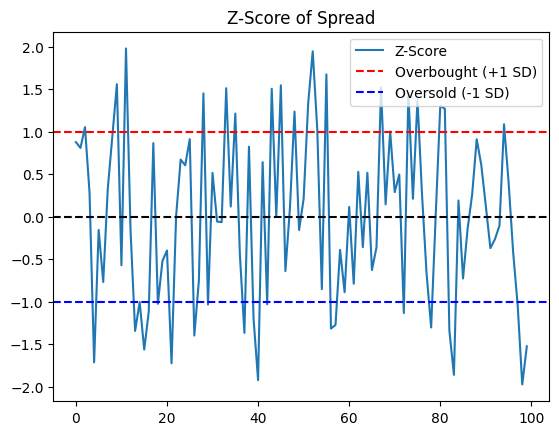

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
# Assuming 'stock1' and 'stock2' represent time series data of stock prices
# Replace with your actual stock price data
# For demonstration, let's generate random data:
np.random.seed(42)  # Setting seed for reproducibility
stock1 = np.random.rand(100) + 100  # Stock1 price, starting around 100
stock2 = np.random.rand(100) + 95   # Stock2 price, starting around 95
spread = stock1 - stock2
z_score = (spread - spread.mean()) / spread.std()
plt.plot(z_score, label='Z-Score')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Overbought (+1 SD)')
plt.axhline(-1, color='blue', linestyle='--', label='Oversold (-1 SD)')
plt.legend()
plt.title('Z-Score of Spread')
plt.show()

### Limitations of the Normal Distribution 
##### 1. Fat Tails: Normal distribution underestimates extreme events (e.g., financial crises).
##### 2. Skewness:Financial data is often asymmetric.
##### 3. Volatility Clustering:Periods of high volatility often follow each other (not captured by σ).
##### 4. Autocorrelation:Past returns can influence future returns.
##### 5. Log-Normal Behavior:Asset prices cannot be negative, making the log-normal distribution more realistic.

### Addressing Limitations 
##### 1. Alternative Distributions:
   - T-Distribution: Captures fat tails.
   - Lévy Distribution: Models extreme jumps.

##### 2. Monte Carlo Simulations: Generate samples from fat-tailed distributions for risk assessment.

### Python: Simulating T-Distribution

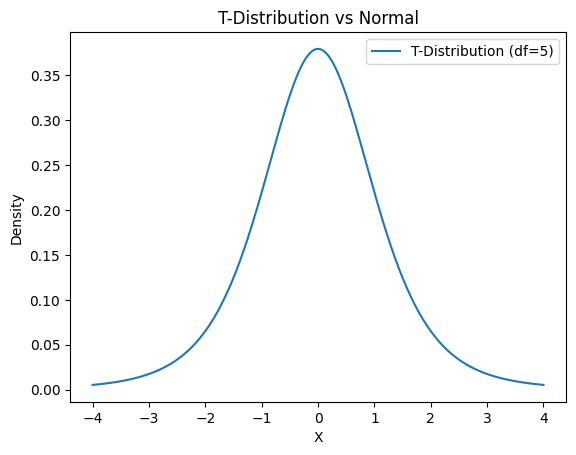

In [13]:
from scipy.stats import t
# Parameters 
df = 5  # Degrees of freedom
x = np.linspace(-4,  4, 1000)
pdf = t.pdf(x, df)
# Plot
plt.plot(x, pdf, label=f'T-Distribution (df={df})')
plt.title( 'T-Distribution vs Normal')
plt.xlabel( 'X')
plt.ylabel('Density')
plt.legend()
plt.show()


## Conclusion 

##### The normal distribution remains a cornerstone in finance for its simplicity and versatility. However, practitioners must account for its limitations by incorporating alternative distributions and robust techniques. Combining theoretical understanding with Python allows for better risk assessment, strategy design, and decision-making in quantitative finance and algorithmic trading.